Extracting characters...


C:\Users\Stelios\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  del sys.path[0]
C:\Users\Stelios\Anaconda2\lib\site-packages\ipykernel_launcher.py:75: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
C:\Users\Stelios\Anaconda2\lib\site-packages\ipykernel_launcher.py:101: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


Characters recognized: 1083
training character: 1/1083)
training character: 2/1083)
training character: 3/1083)
training character: 4/1083)
training character: 5/1083)
training character: 6/1083)
training character: 7/1083)
training character: 8/1083)
training character: 9/1083)
training character: 10/1083)
training character: 11/1083)
training character: 12/1083)
training character: 13/1083)
training character: 14/1083)
training character: 15/1083)
training character: 16/1083)
training character: 17/1083)
training character: 18/1083)
training character: 19/1083)
training character: 20/1083)
training character: 21/1083)
training character: 22/1083)
training character: 23/1083)
training character: 24/1083)
training character: 25/1083)
training character: 26/1083)
training character: 27/1083)
training character: 28/1083)
training character: 29/1083)
training character: 30/1083)
training character: 31/1083)
training character: 32/1083)
training character: 33/1083)
training character: 34/1

training character: 395/1083)
training character: 396/1083)
training character: 397/1083)
training character: 398/1083)
training character: 399/1083)
training character: 400/1083)
training character: 401/1083)
training character: 402/1083)
training character: 403/1083)
training character: 404/1083)
training character: 405/1083)
training character: 406/1083)
training character: 407/1083)
training character: 408/1083)
training character: 409/1083)
training character: 410/1083)
training character: 411/1083)
training character: 412/1083)
training character: 413/1083)
training character: 414/1083)
training character: 415/1083)
training character: 416/1083)
training character: 417/1083)
training character: 418/1083)
training character: 419/1083)
training character: 420/1083)
training character: 421/1083)
training character: 422/1083)
training character: 423/1083)
training character: 424/1083)
training character: 425/1083)
training character: 426/1083)
training character: 427/1083)
training c

training character: 722/1083)
training character: 723/1083)
training character: 724/1083)
training character: 725/1083)
training character: 726/1083)
training character: 727/1083)
training character: 728/1083)
training character: 729/1083)
training character: 730/1083)
training character: 731/1083)
training character: 732/1083)
training character: 733/1083)
training character: 734/1083)
training character: 735/1083)
training character: 736/1083)
training character: 737/1083)
training character: 738/1083)
training character: 739/1083)
training character: 740/1083)
training character: 741/1083)
training character: 742/1083)
training character: 743/1083)
training character: 744/1083)
training character: 745/1083)
training character: 746/1083)
training character: 747/1083)
training character: 748/1083)
training character: 749/1083)
training character: 750/1083)
training character: 751/1083)
training character: 752/1083)
training character: 753/1083)
training character: 754/1083)
training c

training character: 1053/1083)
training character: 1054/1083)
training character: 1055/1083)
training character: 1056/1083)
training character: 1057/1083)
training character: 1058/1083)
training character: 1059/1083)
training character: 1060/1083)
training character: 1061/1083)
training character: 1062/1083)
training character: 1063/1083)
training character: 1064/1083)
training character: 1065/1083)
training character: 1066/1083)
training character: 1067/1083)
training character: 1068/1083)
training character: 1069/1083)
training character: 1070/1083)
training character: 1071/1083)
training character: 1072/1083)
training character: 1073/1083)
training character: 1074/1083)
training character: 1075/1083)
training character: 1076/1083)
training character: 1077/1083)
training character: 1078/1083)
training character: 1079/1083)
training character: 1080/1083)
training character: 1081/1083)
training character: 1082/1083)
training character: 1083/1083)
(1.562999963760376, 'seconds')


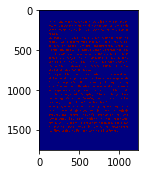

In [35]:
import time
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.misc import imread,imresize,imsave
from skimage.segmentation import clear_border
from skimage.morphology import label
from skimage.measure import regionprops

class Extract_Letters:
    def extractFile(self, filename):
        image = imread(filename,1)
    
        #apply threshold in order to make the image binary
        bw = image < 120
    
        # remove artifacts connected to image border
        cleared = bw.copy()
        #clear_border(cleared)

        # label image regions
        label_image = label(cleared,neighbors=8)
        borders = np.logical_xor(bw, cleared)
        label_image[borders] = -1
    
        fig = plt.figure()
        ax = fig.add_subplot(131)
        ax.imshow(bw, cmap='jet')

        letters = list()
        order = list()
    
        for region in regionprops(label_image):
            minc, minr, maxc, maxr = region.bbox
            # skip small images
            if maxc - minc > len(image)/105: # better to use height rather than area.
                rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                      fill=False, edgecolor='red', linewidth=2)
                order.append(region.bbox)

        #sort the detected characters left->right, top->bottom
        lines = list()
        first_in_line = ''
        counter = 0

        #worst case scenario there can be 1 character per line
        for x in range(len(order)):
            lines.append([])
        for character in order:
            if first_in_line == '':
                first_in_line = character
                lines[counter].append(character)
            elif abs(character[0] - first_in_line[0]) < (first_in_line[2] - first_in_line[0]):
                lines[counter].append(character)
            elif abs(character[0] - first_in_line[0]) > (first_in_line[2] - first_in_line[0]):
                first_in_line = character
                counter += 1
                lines[counter].append(character)

        for x in range(len(lines)):       
            lines[x].sort(key=lambda tup: tup[1])

        final = list()
        prev_tr = 0
        prev_line_br = 0
        katiee=0
        for i in range(len(lines)):
            for j in range(len(lines[i])):
                tl_2 = lines[i][j][1]
                bl_2 = lines[i][j][0]
                if tl_2 > prev_tr and bl_2 > prev_line_br:
                    tl,tr,bl,br = lines[i][j]
                    letter_raw = bw[tl:bl,tr:br].astype(np.float32)
                    letter_norm = imresize(letter_raw,(20,20))
                    katiee+=1
                    final.append(letter_norm)
                    prev_tr = lines[i][j][3]
                if j == (len(lines[i])-1):
                    prev_line_br = lines[i][j][2]
            prev_tr = 0
            tl_2 = 0
        print ('Characters recognized: ' + str(len(final)))
        return final


    def __init__(self):
        print ("Extracting characters...")

start_time = time.time()
extract = Extract_Letters()
training_files = 'ocr/testing/adobe.png'
name_counter = 1
letters = extract.extractFile(training_files)
for i in letters:
    dir_name = './textchars/'
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)       


    imsave(dir_name + str(name_counter) + '_snippet.png', i)
    print ('training character: '+ str(name_counter) + '/' + str(len(letters)) + ')')
    name_counter += 1
print (time.time() - start_time, "seconds" )